# Credit Risk Prediction with SVM

## Dataset: Home Credit Default Risk
- **Source**: [Kaggle Home Credit Default Risk Competition](https://www.kaggle.com/competitions/home-credit-default-risk)
- **Description**: Predicts loan default risk using applicant data (e.g., income, credit history). Primary file: `application_train.csv` (~300,000 rows, 122 features, binary target: 0 = repaid, 1 = default).
- **Files Used**: `application_train.csv` (main training data).

In [6]:
#import libraries to work with
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data_path = '../data/application_train.csv'
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())
print("\nTarget Distribution:")
print(df['TARGET'].value_counts(normalize=True))

Dataset Shape: (307511, 122)

Columns: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'Y

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Target Distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


## Exploratory Data Analysis (EDA)
Objective: Analyze feature distributions, missing values, and class imbalance to inform preprocessing and modeling.

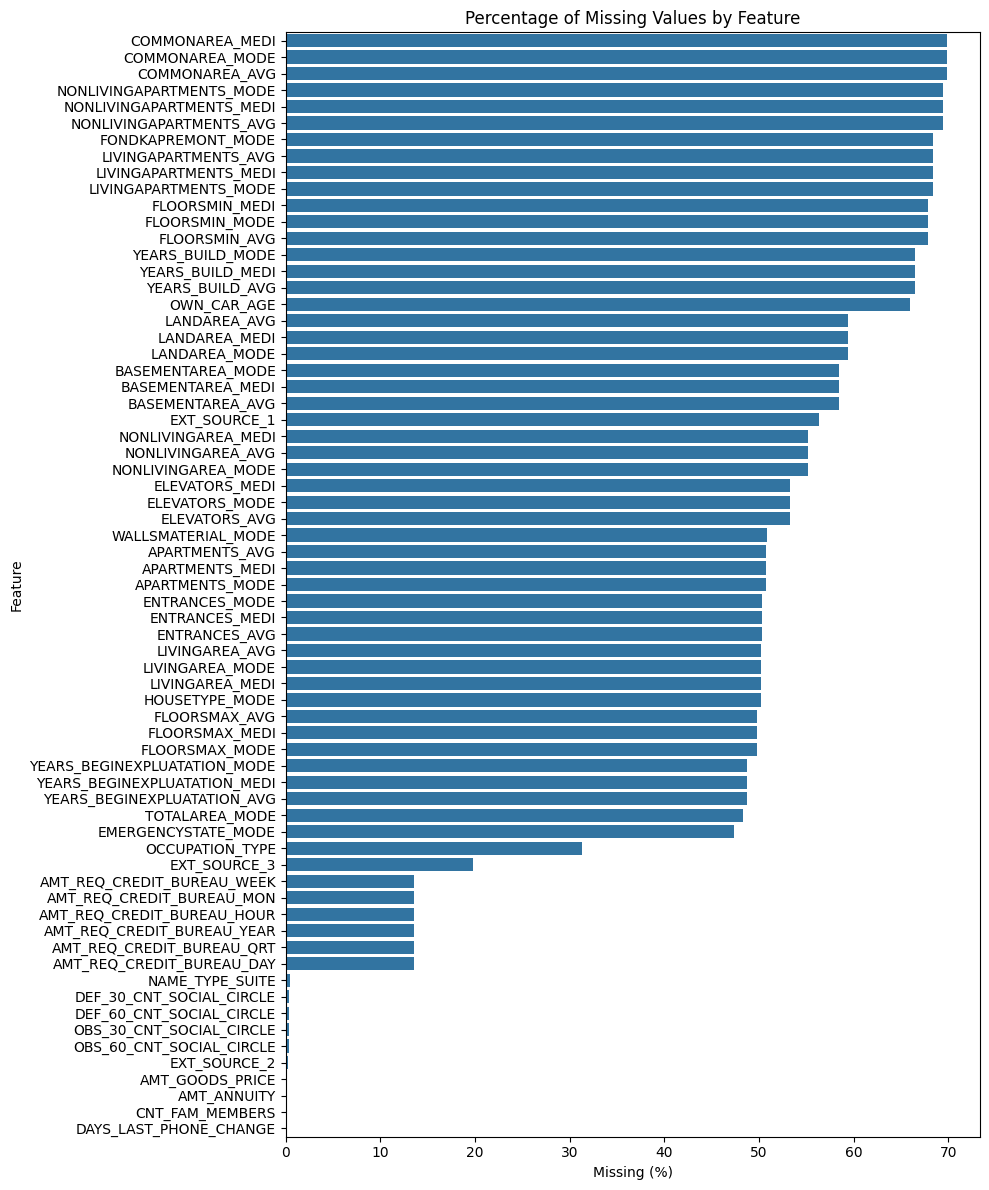

Features with missing data: 67

Top 5 features with highest missing %:
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
dtype: float64


In [19]:
# Calculate percentage of missing values per column
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 12))
sns.barplot(x=missing.values, y=missing.index)
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Missing (%)')
plt.ylabel('Feature')
plt.savefig('../images/missing_values.png', dpi=300)
plt.tight_layout()
plt.show()

# Summary
print(f"Features with missing data: {len(missing)}")
print("\nTop 5 features with highest missing %:")
print(missing.head())

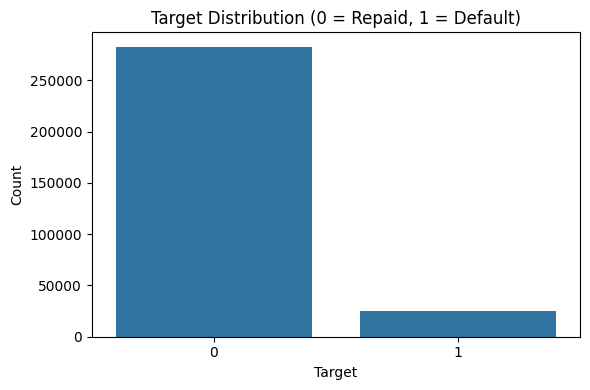

Target Distribution (%):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [20]:
# Plot target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df)
plt.title('Target Distribution (0 = Repaid, 1 = Default)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/target_distribution.png', dpi=300)
plt.show()

# Print proportions
print("Target Distribution (%):")
print(df['TARGET'].value_counts(normalize=True) * 100)

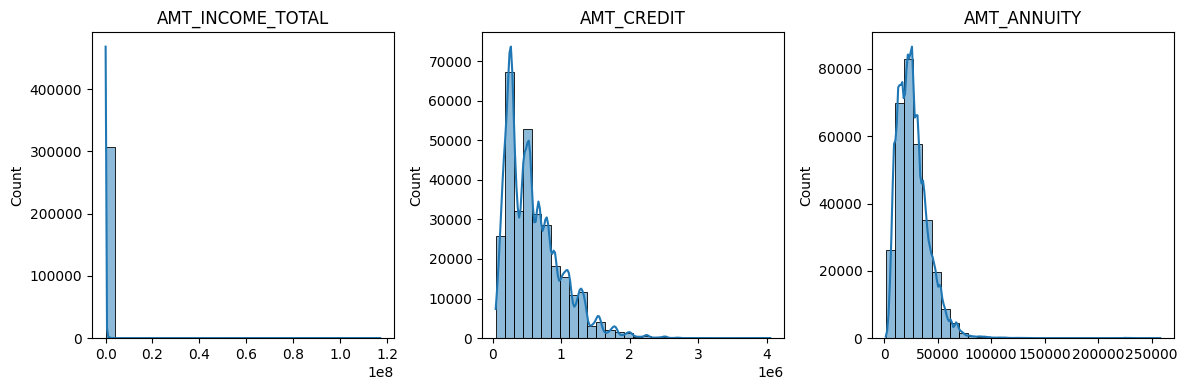

In [21]:
# Numerical features
num_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
plt.figure(figsize=(12, 4))
for i, feature in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature].dropna(), bins=30, kde=True)
    plt.title(feature)
    plt.xlabel('')
plt.tight_layout()
plt.savefig('../images/numerical_distributions.png', dpi=300)
plt.show()

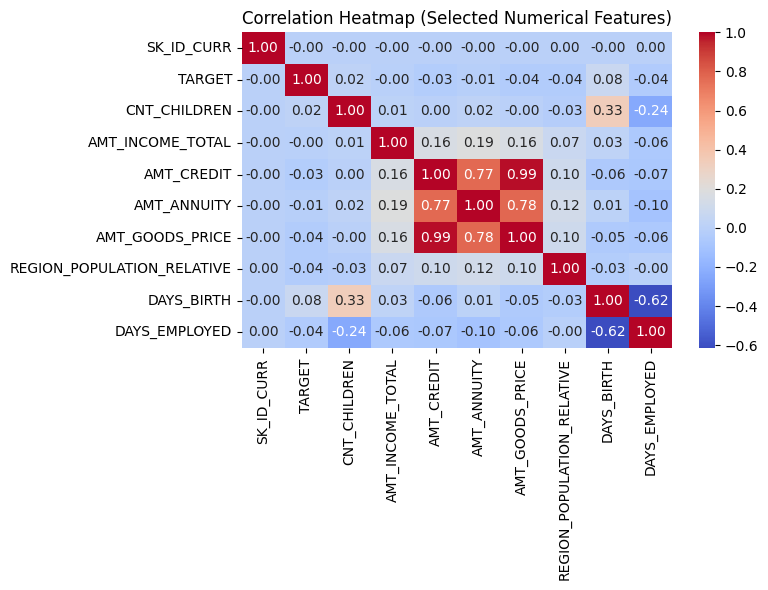

In [22]:
# Select numerical features for correlation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns[:10]  # Limit for speed
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Selected Numerical Features)')
plt.tight_layout()
plt.savefig('../images/correlation_heatmap.png', dpi=300)
plt.show()

### EDA Findings
- **Missing Values**: ~67 features have missing data, some with >50% missing (e.g., `OWN_CAR_AGE`). Imputation or removal needed.
- **Target Imbalance**: ~8% defaults (`TARGET=1`), ~92% repaid (`TARGET=0`). SMOTE or class weights required.
- **Feature Distributions**: Numerical features (e.g., `AMT_INCOME_TOTAL`) are skewed, suggesting log-transformation. Categorical features (e.g., `CODE_GENDER`) show uneven distributions.
- **Correlations**: Weak correlations among most numerical features, but some pairs (e.g., `AMT_CREDIT` and `AMT_ANNUITY`) show moderate correlation.